In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
# Glucose

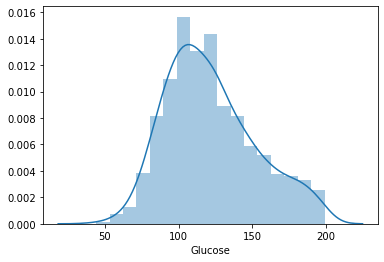

In [7]:
sns.distplot(df['Glucose'])

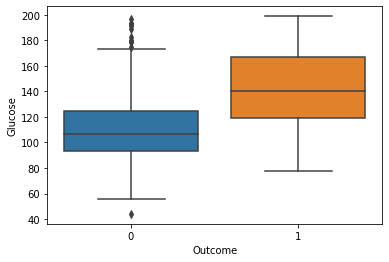

In [8]:
sns.boxplot('Outcome','Glucose',data=df)

In [9]:
df['Glucose'][df['Outcome']==0].median(),df['Glucose'][df['Outcome']==1].median()

(107.0, 140.0)

In [10]:
def fill1(col):
    glu = col[0]
    out = col[1]
    if pd.isnull(glu):
        if out==0:
            return df['Glucose'][df['Outcome']==0].median()
        else:
            return df['Glucose'][df['Outcome']==1].median()
    else:
        return glu

In [11]:
df['Glucose'] = df[['Glucose','Outcome']].apply(fill1,axis=1)

In [12]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# BloodPressure

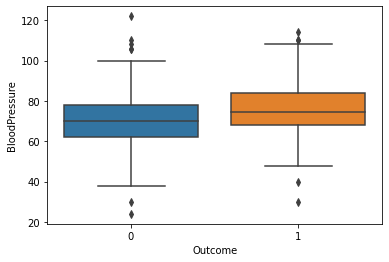

In [14]:
sns.boxplot('Outcome','BloodPressure',data=df)

In [15]:
df['BloodPressure'][df['Outcome']==0].median(),df['BloodPressure'][df['Outcome']==1].median(),df['BloodPressure'].median()

(70.0, 74.5, 72.0)

In [16]:
def fill2(col):
    bp = col[0]
    out = col[1]
    if pd.isnull(bp):
        if out==0:
            return df['BloodPressure'][df['Outcome']==0].median()
        else:
            return df['BloodPressure'][df['Outcome']==1].median()
    else:
        return bp

In [17]:
df['BloodPressure'] = df[['BloodPressure','Outcome']].apply(fill2,axis=1)

In [18]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
# SkinThickness

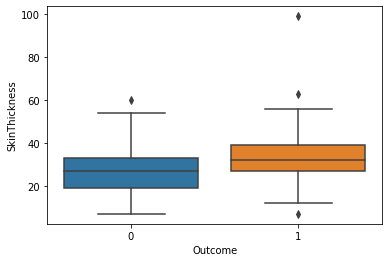

In [20]:
sns.boxplot(df['Outcome'],df['SkinThickness'])

In [21]:
df['SkinThickness'].median(),df['SkinThickness'][df['Outcome']==0].median(),df['SkinThickness'][df['Outcome']==1].median()

(29.0, 27.0, 32.0)

In [22]:
def fill3(col):
    st = col[0]
    out = col[1]
    if pd.isnull(st):
        if out==0:
            return df['SkinThickness'][df['Outcome']==0].median()
        else:
            return df['SkinThickness'][df['Outcome']==1].median()
    else:
        return st

In [23]:
df['SkinThickness'] = df[['SkinThickness','Outcome']].apply(fill3,axis=1)

In [29]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
def fill4(col):
    ins = col[0]
    out = col[1]
    if pd.isnull(ins):
        if out==0:
            return df['Insulin'][df['Outcome']==0].median()
        else:
            return df['Insulin'][df['Outcome']==1].median()
    else:
        return ins

In [26]:
df['Insulin'] = df[['Insulin','Outcome']].apply(fill4,axis=1)

In [27]:
def fill5(col):
    bm = col[0]
    out = col[1]
    if pd.isnull(bm):
        if out==0:
            return df['BMI'][df['Outcome']==0].median()
        else:
            return df['BMI'][df['Outcome']==1].median()
    else:
        return bm

In [28]:
df['BMI'] = df[['BMI','Outcome']].apply(fill5,axis=1)

In [30]:
df.to_csv('diabetes.csv')